<a href="https://colab.research.google.com/github/yuri-spizhovyi-mit/ET6-ML/blob/main/Session1__data_analysis/notebooks/Flights_Challenge_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈️ Flights Challenge – MIT Emerging Talent

**Author:** Yuri Spizhovyi  
**Source:** [Challenge Description](https://github.com/MIT-Emerging-Talent/ET6-ML/blob/main/Session1__data_analysis/Flights%20Challenge.md)  
**Repo:** [My Repo](https://github.com/yuri-spizhovyi-mit/ET6-ML)

---

This notebook contains a step-by-step solution for the Flights Challenge, including data exploration, visualization, and analysis using Python (Pandas and Matplotlib) in Google Colab.


## Step 1: Clone the repo
Begin by cloning the repo and navigate to the dataset


In [5]:
# Remove previously cloned or duplicated folders (optional, safe cleanup)
!rm -rf ET6-ML ET6-ML_*


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clone once per session
!git clone https://github.com/yuri-spizhovyi-mit/ET6-ML.git

# Move into the correct folder
%cd ET6-ML

Cloning into 'ET6-ML'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 84 (delta 38), reused 17 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 4.64 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/ET6-ML/ET6-ML


## Step 2: Load the Data

Start by loading the `flights.csv` file using Pandas and previewing the first few rows.


In [7]:
df = pd.read_csv('Session1__data_analysis/data/flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Step 3.1: Data Cleaning

### 3.1.1 Identify Missing Data

Before any transformation, inspect the dataset for missing (null) values.  
Missing values can affect calculations, aggregations, and model performance.

Use `isnull().sum()` to count missing values for each column.



In [8]:
# Check for nulls
df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Carrier,0
OriginAirportID,0
OriginAirportName,0
OriginCity,0
OriginState,0
DestAirportID,0


### 3.1.2 Impute Missing Values

Found missing values in `DepDel15`, which indicates whether a departure delay was 15 minutes or more.

Since we have the actual `DepDelay`, we can safely infer this value:
- If `DepDelay >= 15`, then `DepDel15 = 1`
- Else, `DepDel15 = 0`


In [9]:
df['DepDel15'] = df['DepDel15'].fillna((df['DepDelay'] >= 15).astype(int))

### 3.1.3 Identify Outliers

Outliers are extreme values that can distort summary statistics.  
Use the `.describe()` function and visualize using boxplots to identify them.

We're especially interested in extreme delays in:
- `DepDelay`
- `ArrDelay`


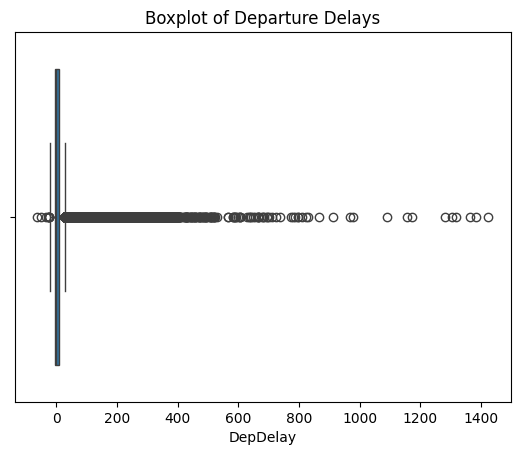

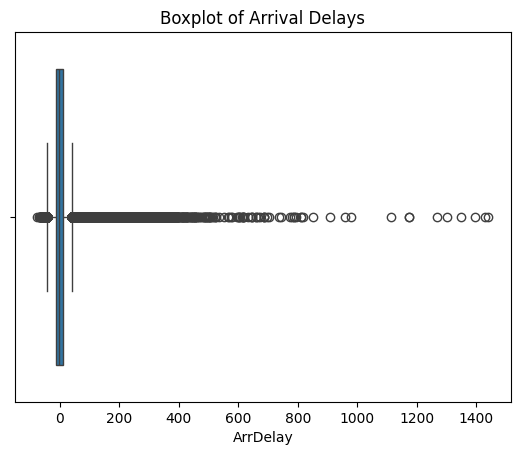

In [10]:
# Summary of delay columns
df[['DepDelay', 'ArrDelay']].describe()

# Optional visualization
sns.boxplot(x=df['DepDelay'])
plt.title("Boxplot of Departure Delays")
plt.show()

sns.boxplot(x=df['ArrDelay'])
plt.title("Boxplot of Arrival Delays")
plt.show()


### 3.1.4 Remove Outliers

To reduce skew and improve statistical clarity, we remove extreme outliers using the 99th percentile.

This means:
- Keep only values **below or equal to** the 99th percentile for both delay columns.


In [11]:
# Calculate 99th percentile thresholds
dep_99 = df['DepDelay'].quantile(0.99)
arr_99 = df['ArrDelay'].quantile(0.99)

# Filter the dataset
df = df[df['DepDelay'] <= dep_99]
df = df[df['ArrDelay'] <= arr_99]


## Step 3.2. Explore the Cleaned Data
3.2.1 View summary statistics for the numeric fields in the dataset.

In [12]:
numeric_summary = df.describe()
numeric_summary

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,268921.0,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000,268921.000000
mean,2013.0,6.984382,15.808453,3.899956,12745.547451,12739.388311,1323.497313,7.862313,0.190100,1503.380472,3.933531,0.207128,0.010795
std,0.0,1.984135,8.803818,1.988376,1501.884763,1503.088214,470.914811,24.567053,0.392381,493.097542,27.659913,0.405249,0.103337
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,918.000000,-4.000000,0.000000,1117.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1315.000000,-1.000000,0.000000,1525.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1721.000000,8.000000,0.000000,1916.000000,9.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,166.000000,1.000000,2359.000000,169.000000,1.000000,1.000000


### Step 3.2.2 – Distribution of Departure and Arrival Delays

We visualize the distributions of `DepDelay` and `ArrDelay` using histograms.

#### 🔹 Departure Delays (`DepDelay`)
- Most flights depart **on time or slightly early**.
- A long tail shows a smaller number of **severe delays**.
- The data is **right-skewed**.

#### 🔹 Arrival Delays (`ArrDelay`)
- Similar pattern: most flights **arrive early or on time**.
- There are fewer flights with long delays (long tail to the right).

These distributions help us understand:
- Whether delays are common
- How severe typical delays are
- The shape of the data (important for modeling)

📊 **Visualizations:**


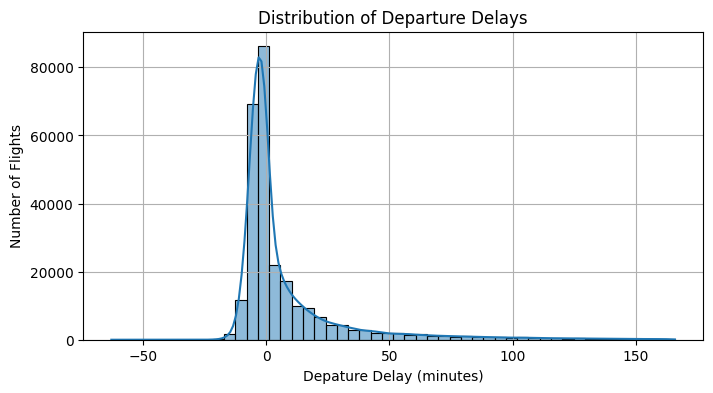

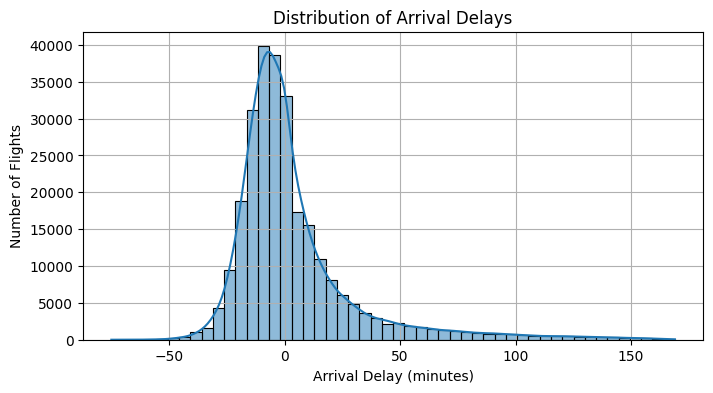

In [13]:
# Histogram for Departure Delays
plt.figure(figsize=(8,4))
sns.histplot(df['DepDelay'], bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel('Depature Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()

# Histogram for Arrival Delays
plt.figure(figsize=(8, 4))
sns.histplot(df['ArrDelay'], bins=50, kde=True)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.show()

## Step 3. Questions

## Step 3.3.1

### Q1 – What are the Average (Mean) Departure and Arrival Delays?

We use `.mean()` to calculate the average values for `DepDelay` and `ArrDelay`.

| Metric               | Value (minutes) |
|----------------------|-----------------|
| Average DepDelay     | 7.86            |
| Average ArrDelay     | 3.93            |

🧠 **Interpretation:**
- On average, flights **depart about 8 minutes late**.
- Arrival delays are slightly lower, with an average of **4 minutes**.
- This may suggest some flights **recover time** during the journey.


In [14]:
# Average (mean) departure and arrival delays
mean_dep_delay = df['DepDelay'].mean()
mean_arr_delay = df['ArrDelay'].mean()

mean_dep_delay, mean_arr_delay


(np.float64(7.862312723811082), np.float64(3.9335306651395765))

## Step 3.3.2

### Q2 – How Do Carriers Compare in Arrival Delay Performance?

We grouped the dataset by `Carrier` and calculated the mean arrival delay for each.

#### 🏅 Top 5 Performing Carriers by Average Arrival Delay:

| Carrier | Avg Arrival Delay (min) |
|---------|--------------------------|
| HA      | -0.95                   |
| AS      | -0.89                   |
| DL      | -0.01                   |
| UA      | 1.64                    |
| 9E      | 2.00                    |

🧠 **Interpretation:**
- **Hawaiian Airlines (HA)** and **Alaska Airlines (AS)** tend to arrive **early** on average.
- **Delta (DL)** is close to zero, indicating consistent on-time arrivals.


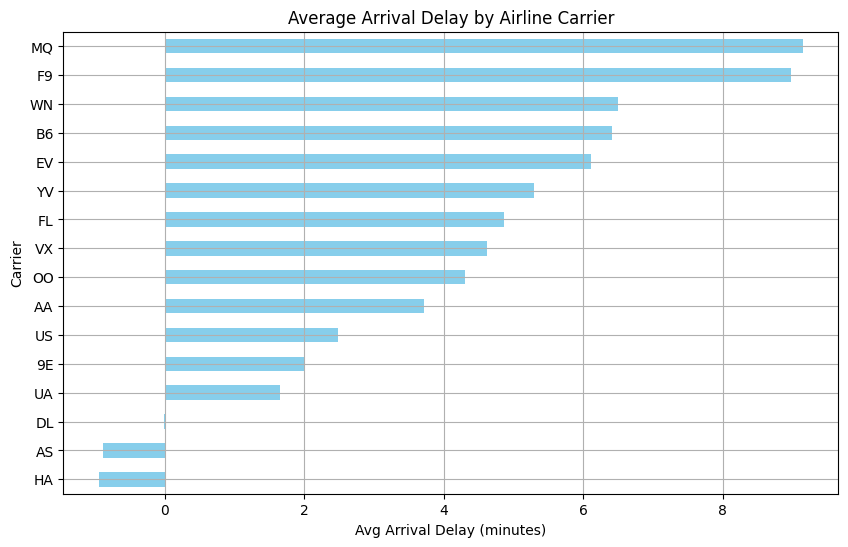

In [15]:
# Group by Carrier and calculate mean arrival delay
carrier_delays = df.groupby('Carrier')['ArrDelay'].mean().sort_values()
plt.figure(figsize=(10, 6))
carrier_delays.plot(kind='barh', color='skyblue')
plt.title("Average Arrival Delay by Airline Carrier")
plt.xlabel("Avg Arrival Delay (minutes)")
plt.ylabel("Carrier")
plt.grid(True)
plt.show()

## Step 3.3.3

### Q3 – Arrival Delays by Day of the Week

We grouped the dataset by `DayOfWeek` (1 = Monday, 7 = Sunday) and computed the average arrival delay.

| Day of Week | Avg Arrival Delay (min) |
|-------------|--------------------------|
| 1 (Mon)     | 4.35                     |
| 2 (Tue)     | 2.11                     |
| 3 (Wed)     | 4.15                     |
| 4 (Thu)     | **7.21**                 |
| 5 (Fri)     | 5.76                     |
| 6 (Sat)     | **0.44**                 |
| 7 (Sun)     | 2.69                     |

🧠 **Interpretation:**
- **Thursday** has the worst average arrival delays.
- **Saturday** has the least delay, possibly due to lower traffic or fewer business travelers.


In [16]:
# Average arrival delay by day of the week
weekday_delays = df.groupby('DayOfWeek')['ArrDelay'].mean().sort_index()
weekday_delays

,ArrDelay
DayOfWeek,
1,4.351904
2,2.111047
3,4.148635
4,7.214289
5,5.757555
6,0.436227
7,2.685475


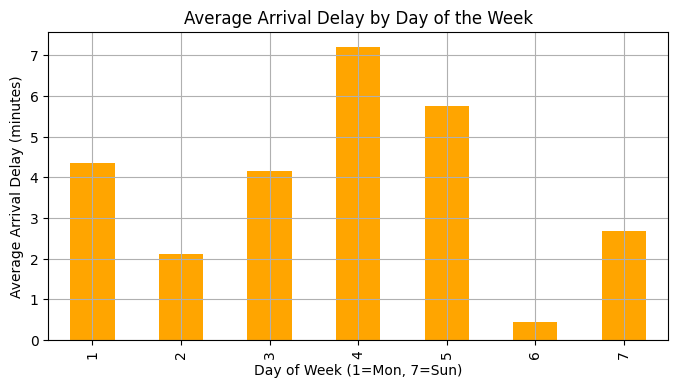

In [17]:
# Bar chart for weekday delays
plt.figure(figsize=(8, 4))
weekday_delays.plot(kind='bar', color='orange')
plt.title("Average Arrival Delay by Day of the Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Arrival Delay (minutes)")
plt.grid(True)
plt.show()

## Step 3.3.4

### Q4 – Departure Airport with the Highest Average Departure Delay

We grouped the dataset by `OriginAirportName` and calculated the average `DepDelay` for each airport.

| Airport                        | Avg Departure Delay |
|--------------------------------|----------------------|
| Chicago Midway International  | **13.7 minutes**     |

🧠 **Interpretation:**
- Flights departing from **Chicago Midway International** have the highest average departure delay among all origin airports in the dataset.



In [18]:
# Find departure airport with highest average departure delay
worst_dep_airport = df.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(1)
worst_dep_airport

,DepDelay
OriginAirportName,
Chicago Midway International,13.699939


## Step 3.3.5

### Q5 – Do Late Departures Lead to Longer Arrival Delays?

We split the dataset into two groups:

- **Late Departures**: `DepDelay > 0`
- **On-Time or Early Departures**: `DepDelay ≤ 0`

| Departure Type       | Avg Arrival Delay (min) |
|----------------------|--------------------------|
| Late Departures      | 21.28                    |
| On-Time/Early        | -7.85                    |

🧠 **Interpretation:**
- Flights that depart late tend to arrive **significantly late**.
- Flights that depart on time or early tend to arrive **early**.
- This confirms that departure delay strongly influences arrival performance.


In [19]:
# Compare arrival delay after late vs. on-time departures
late_arrival_delay = df[df['DepDelay'] > 0]['ArrDelay'].mean()
on_time_arrival_delay = df[df['DepDelay'] <= 0]['ArrDelay'].mean()

late_arrival_delay, on_time_arrival_delay

(np.float64(21.283728115345006), np.float64(-7.8469554033552065))

## Step 3.3.6

### Q6 – Route with the Most Late Arrivals

We filtered the dataset for flights where `ArrDelay > 0` and counted occurrences by route.

| Route                                                  | Late Arrivals |
|--------------------------------------------------------|----------------|
| Los Angeles International → San Francisco International | **443**        |

🧠 **Interpretation:**
- The route from **Los Angeles to San Francisco** has the **highest number of late arrivals**.
- This could be due to **short-haul congestion**, high traffic, or airspace/weather patterns in California.


In [20]:
# Route with the most late arrivals
df['ROUTE'] = df['OriginAirportName'] + ' → ' + df['DestAirportName']
most_late_arrivals = df[df['ArrDelay'] > 0]['ROUTE'].value_counts().head(1)
most_late_arrivals


,count
ROUTE,
Los Angeles International → San Francisco International,443


## Step 3.3.7

### Q7 – Route with the Highest Average Arrival Delay

We grouped the dataset by `ROUTE` and calculated the mean `ArrDelay` for each route.

| Route                                                   | Avg Arrival Delay (min) |
|----------------------------------------------------------|--------------------------|
| Pittsburgh International → Raleigh-Durham International | **63.0**                 |

🧠 **Interpretation:**
- This route experiences the **highest average arrival delay** in the dataset.
- The delay is **significantly above average**, indicating consistent issues (e.g., airport congestion or weather patterns).



In [21]:
df['ROUTE'] = df['OriginAirportName'] + ' → ' + df['DestAirportName']

# Route with the highest average arrival delay
highest_avg_arr_delay = df.groupby('ROUTE')['ArrDelay'].mean().sort_values(ascending=False).head(1)